In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Pour tester les performances des modèles utilisés
from sklearn import metrics

## Importation des modèles de Machine Learning

In [2]:
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


## Importation des données

In [3]:
fetal_health = pd.read_csv("./data/fetal_health.csv")
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Analyse des données

In [5]:
fetal_health.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
fetal_health.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

We can see that there are no missing values in our dataset

In [7]:
fetal_health['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

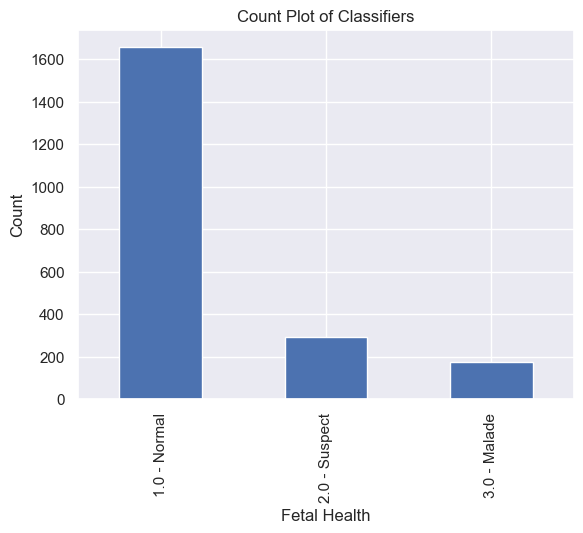

In [8]:

fetal_health['fetal_health'].value_counts().plot.bar()
plt.xticks(ticks=[0, 1, 2], labels=['1.0 - Normal', '2.0 - Suspect', '3.0 - Malade'])
plt.title('Count Plot of Classifiers')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()


We can see that the 3 classes are unbalanced such that the distribution is as follows: 
- 1.0 (Normale) : 1655
- 2.0 (Suspect): 295
- 3.0 (Malade) : 176

On va maintenant passer à une rapide visualisation des données. On commence par observer la distribution des différentes variables 

In [9]:
columns_fetal =fetal_health.copy()
columns_fetal.drop(['fetal_health'],axis=1,inplace=True)
columns =list(columns_fetal)
columns

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [10]:
fetal_health['fetal_movement'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2121    False
2122    False
2123    False
2124    False
2125    False
Name: fetal_movement, Length: 2126, dtype: bool

In [11]:
columns_fetal.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,-0.147679,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,0.298631,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,0.162790,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,0.142541,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,0.520467,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,0.044880,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,0.265391,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,-0.260463,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,0.660847,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,-0.451297,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481


## Visualisation des données

<Axes: >

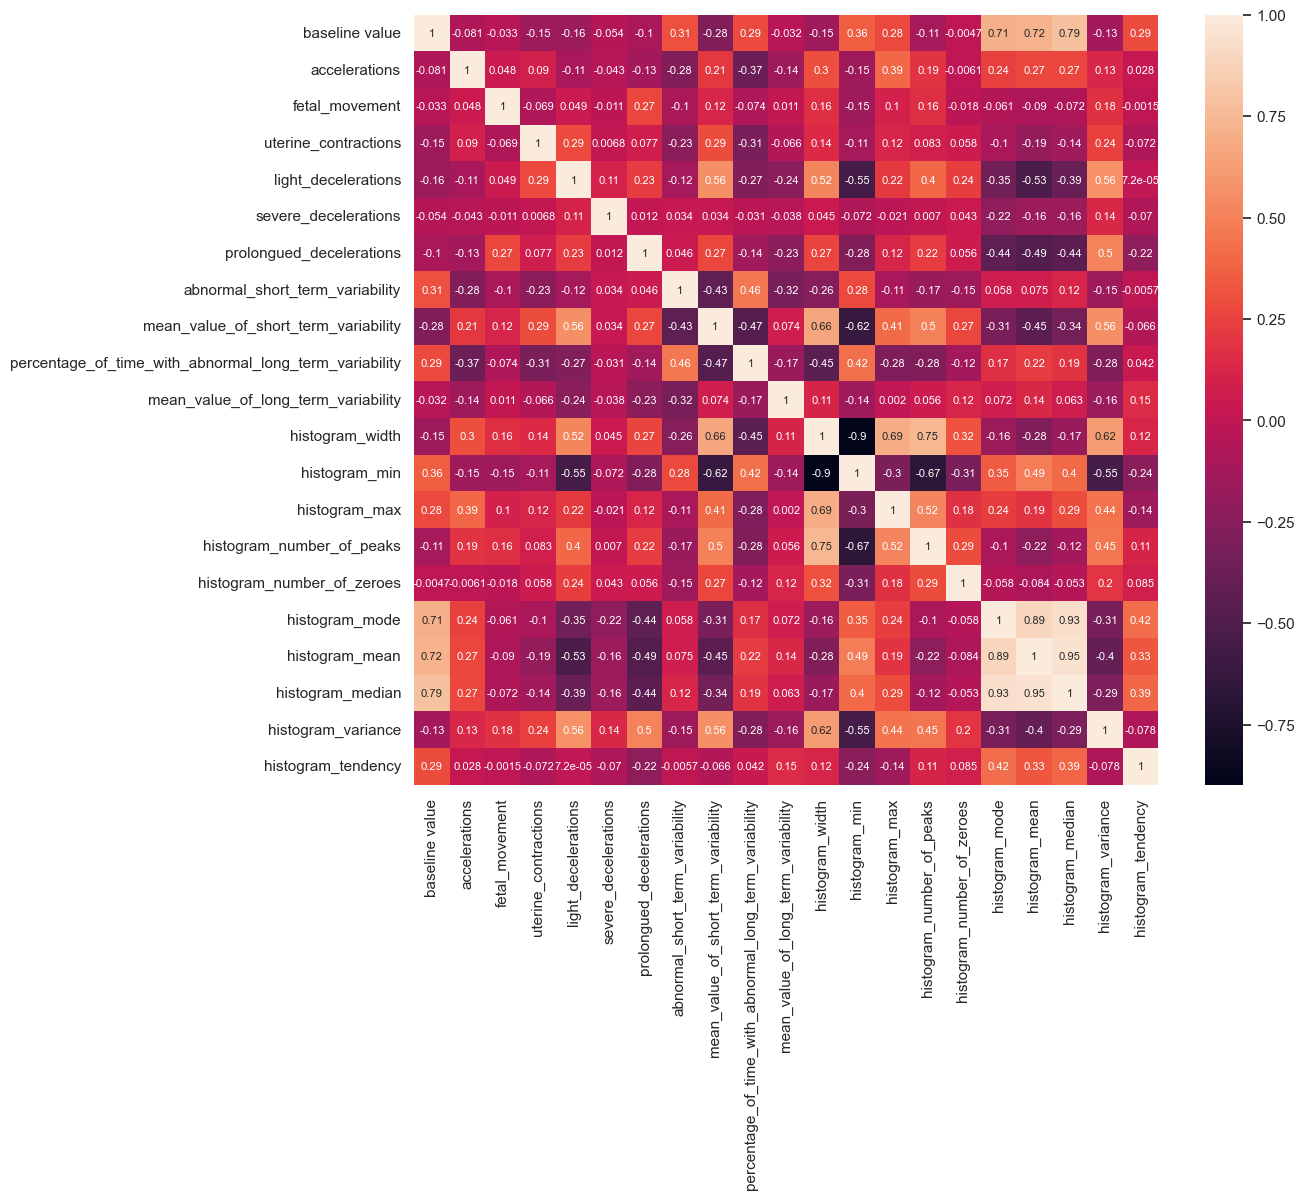

In [12]:
plt.figure(figsize=(12,10))

sns.heatmap(columns_fetal.corr(),annot=True,annot_kws={'fontsize':8})

In [13]:
#sns.pairplot(fetal_health)

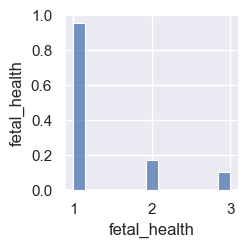

In [14]:
sns.pairplot(fetal_health[['fetal_health']])

## data distribution with Box Plots :

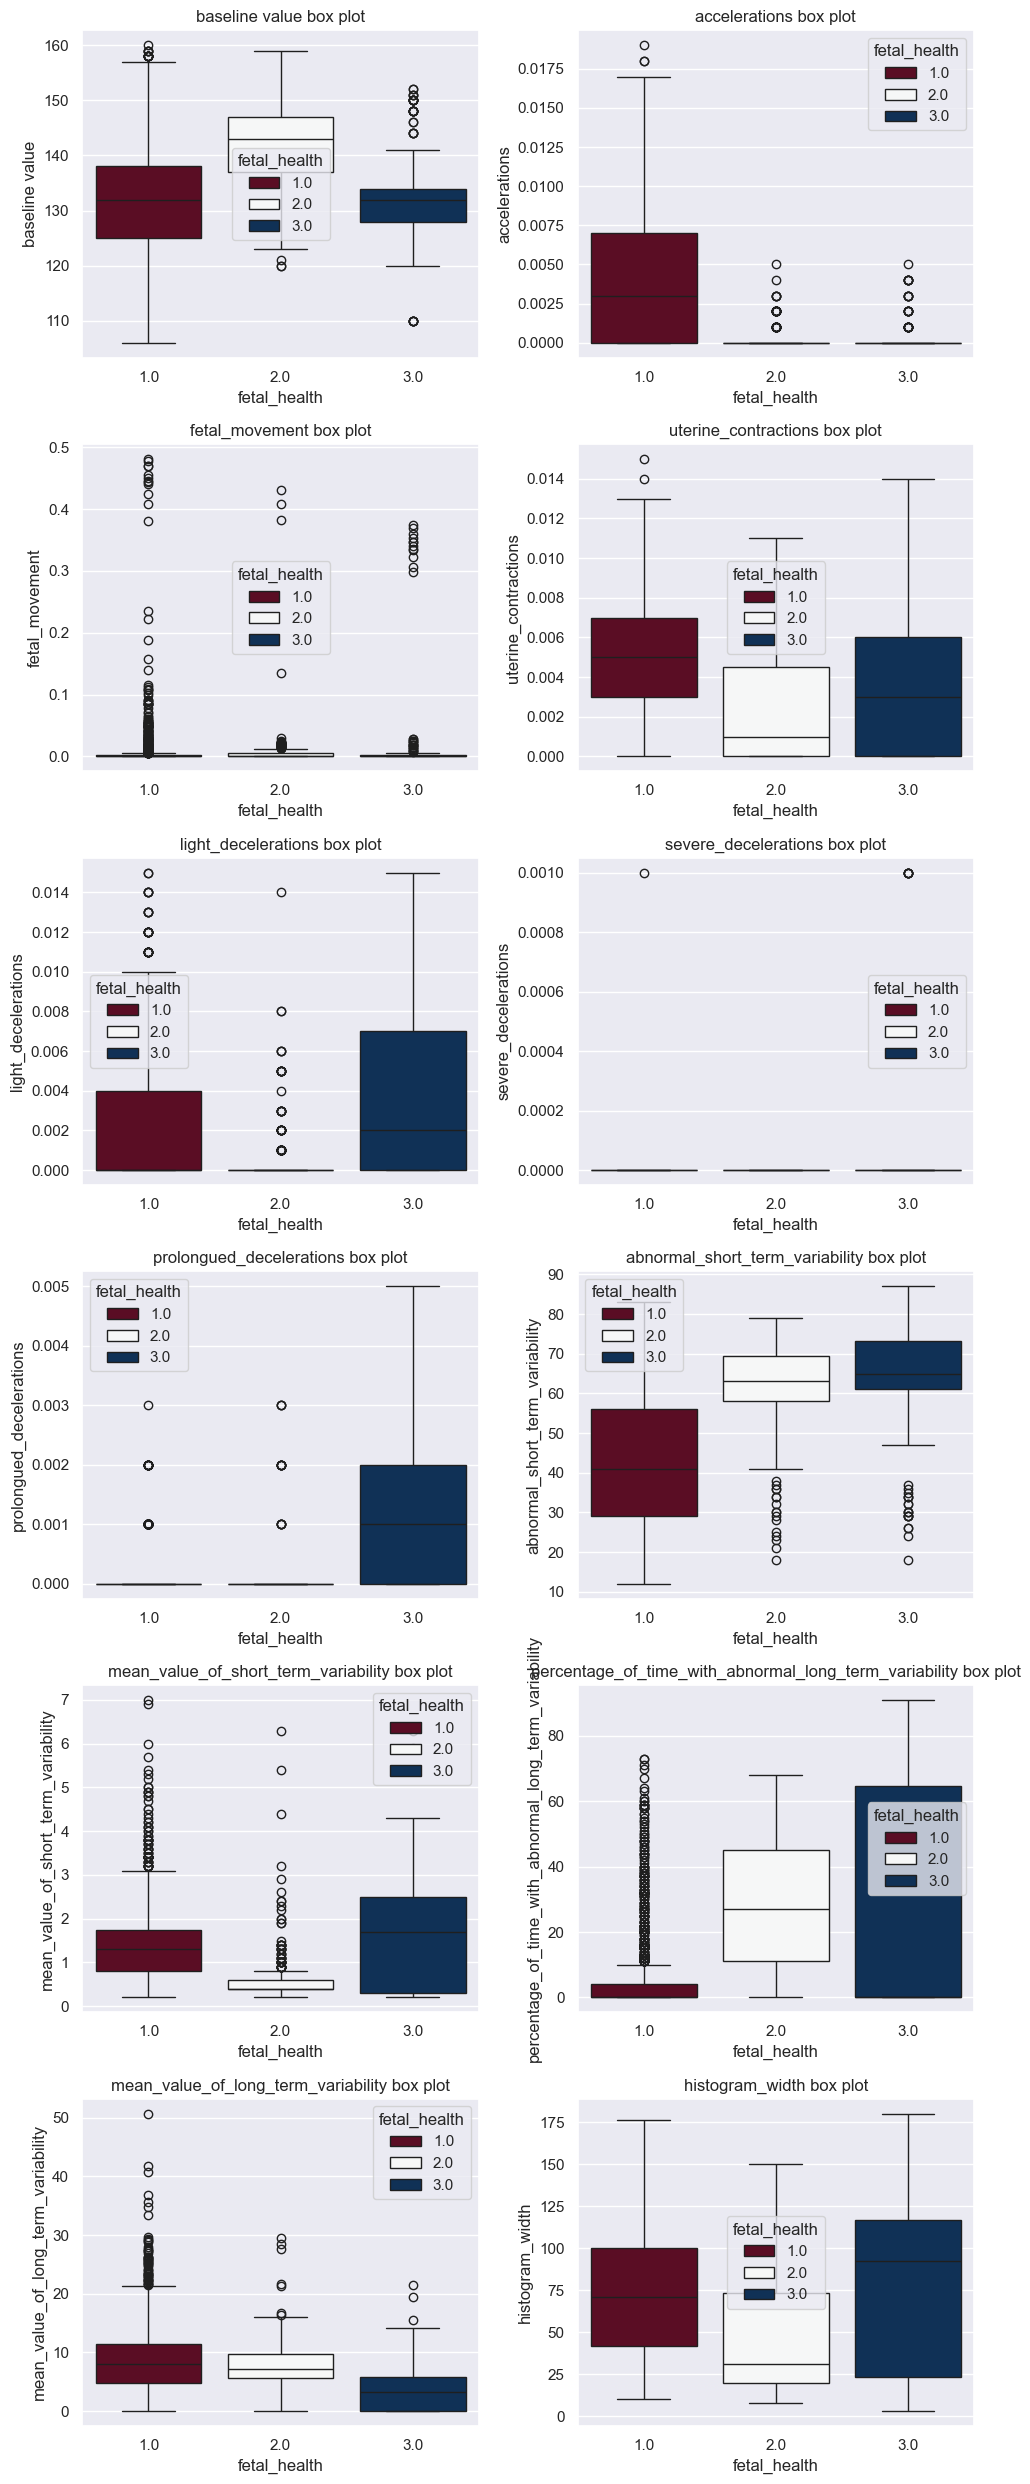

In [15]:
fig = plt.figure(figsize=(10,25))
axes = fig.subplots(6,2)
columns1 =fetal_health.columns.values
i=0
for raw in range(6):
    for col in range(2):
        sns.boxplot(x=fetal_health['fetal_health'],y=fetal_health[columns1[i]],data=fetal_health,ax=axes[raw,col],hue='fetal_health',palette='RdBu')
        axes[raw,col].set_title(f'{columns1[i]} box plot')
        i+=1
fig.tight_layout()
plt.show()

## data distribution with histograms :

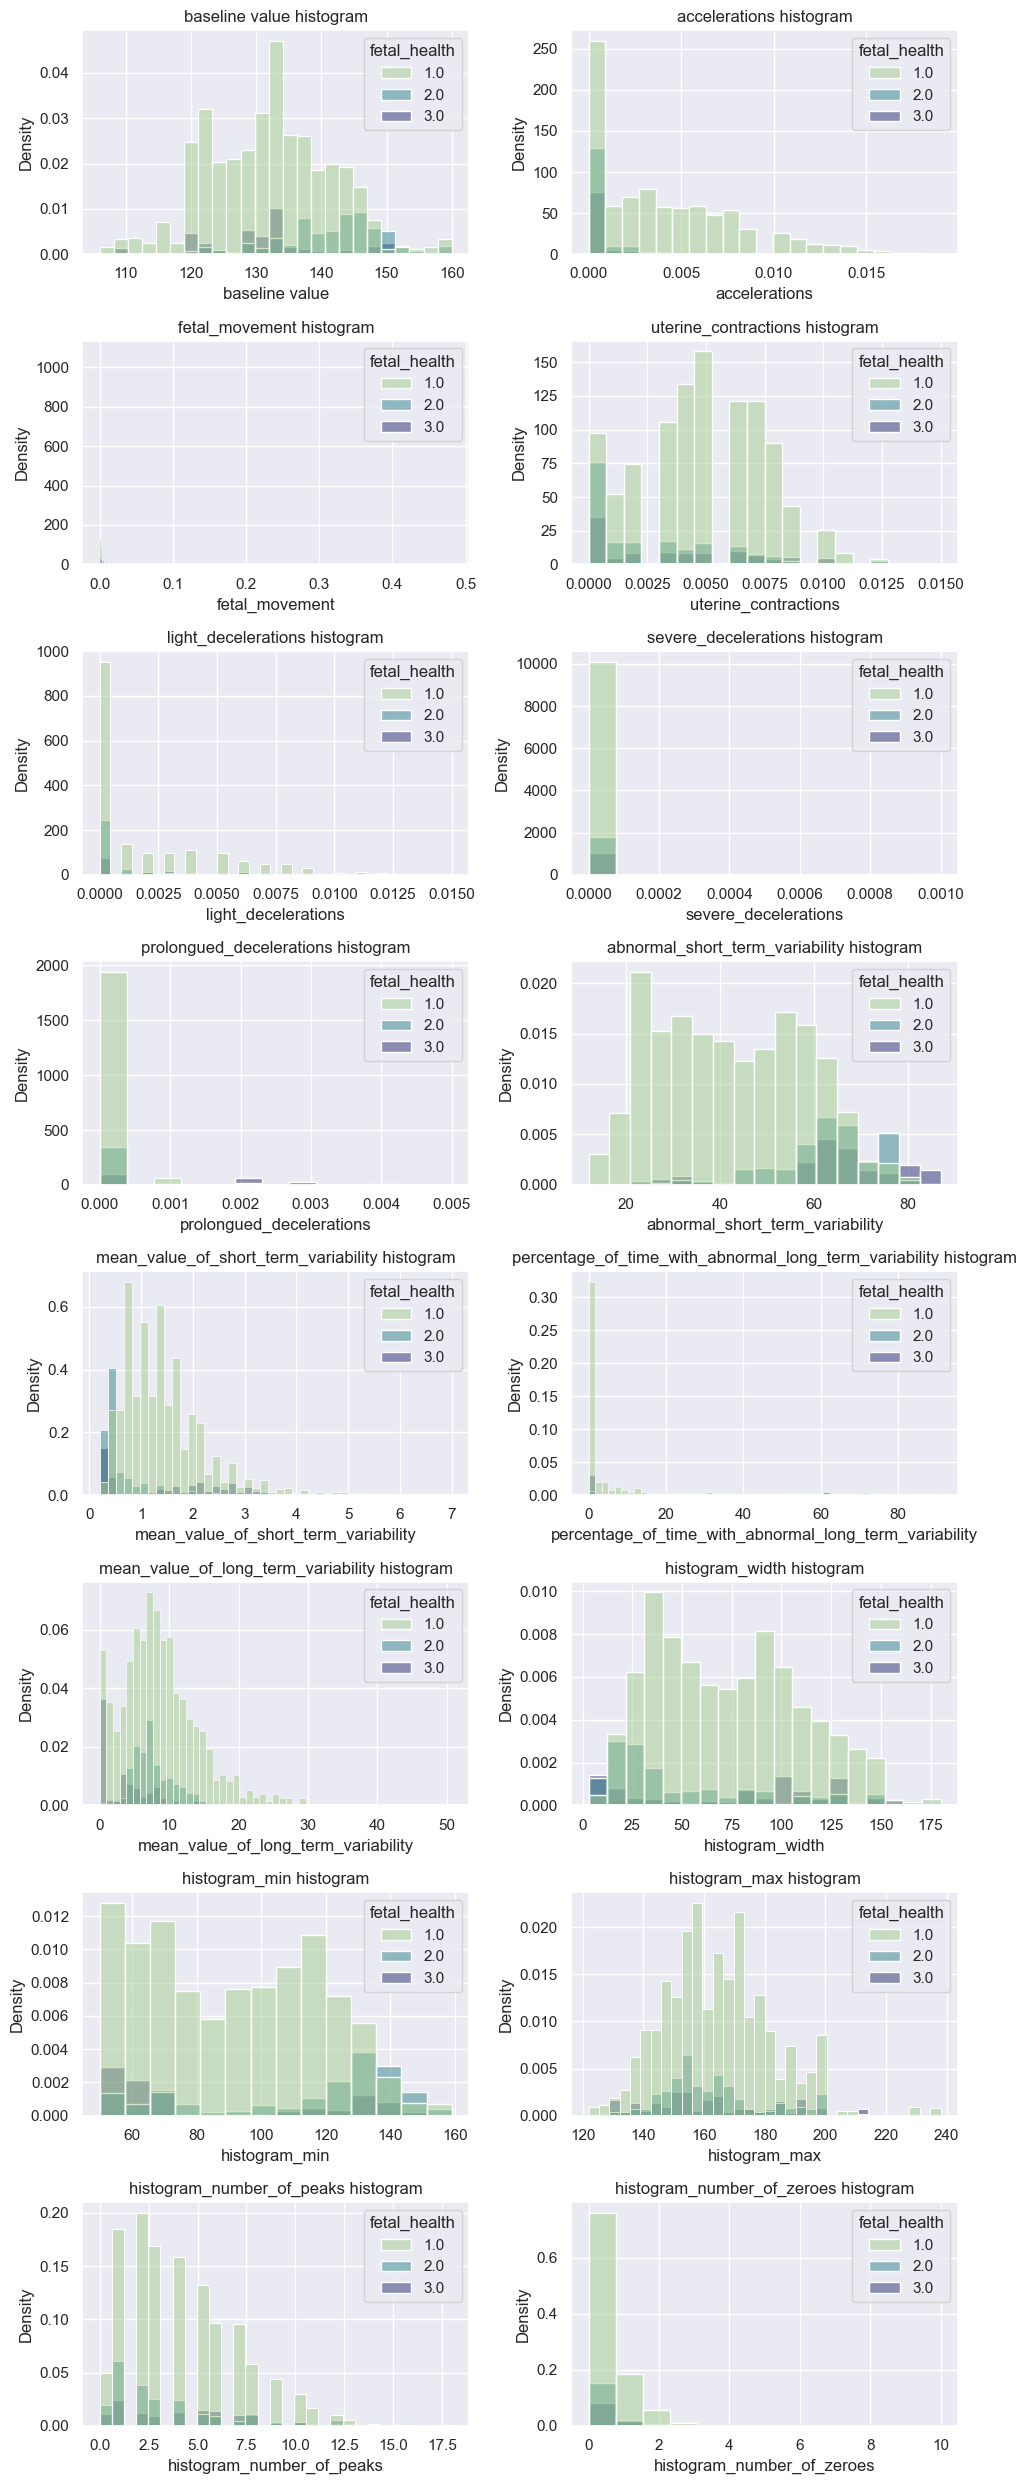

In [16]:
fig = plt.figure(figsize=(10,25))
axes = fig.subplots(8,2)
columns1 =fetal_health.columns.values
i=0
for raw in range(8):
    for col in range(2):
        sns.histplot(data=fetal_health,x=fetal_health[columns1[i]],stat='density',hue=fetal_health['fetal_health'],ax=axes[raw,col],palette='crest')
        axes[raw,col].set_title(f'{columns1[i]} histogram')
        i+=1
fig.tight_layout()
plt.show()

## Préparation des données

In [17]:
features_fetal = fetal_health.copy()
etiq= features_fetal['fetal_health']
features_fetal.drop(['fetal_health'],axis=1,inplace=True)
features_fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [18]:
etiq.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

subdivision of data :(without normalisation)

In [19]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_fetal, etiq, test_size=0.3,random_state=23)

In [20]:
fv_train.shape

(1488, 21)

normalisation :

In [21]:
features_fetal_scaled = StandardScaler().fit_transform(features_fetal)
features_fetal_scaled =pd.DataFrame(features_fetal_scaled,columns=list(features_fetal.columns))
features_fetal_scaled.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


subdivision of data : (with normalisation)

In [22]:
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features_fetal_scaled, etiq, test_size=0.3,random_state=23)

In [23]:
fv_train_scaled.shape

(1488, 21)

## Application des modèles

## KNN :

In [24]:
parameters = {'n_neighbors':np.arange(1,20,2), 'p' : np.arange(1,3,1)}
knn =KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, return_train_score=True)
clf.fit(fv_train,etiq_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=1, p=1)

rapport de tous les cas aborde :

In [25]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003202,0.000746,0.071196,0.094317,1,1,"{'n_neighbors': 1, 'p': 1}",0.916107,0.902685,0.926174,...,0.905222,0.015943,1,1.000000,0.999160,1.000000,0.999160,0.999160,0.999496,0.000411
3,0.002959,0.001100,0.017389,0.001471,3,2,"{'n_neighbors': 3, 'p': 2}",0.909396,0.926174,0.912752,...,0.904547,0.016135,2,0.938655,0.936134,0.931092,0.943745,0.937867,0.937499,0.004084
1,0.002599,0.000800,0.022847,0.008608,1,2,"{'n_neighbors': 1, 'p': 2}",0.912752,0.892617,0.916107,...,0.901871,0.011612,3,1.000000,0.999160,1.000000,0.999160,0.999160,0.999496,0.000411
2,0.002402,0.000491,0.020861,0.002755,3,1,"{'n_neighbors': 3, 'p': 1}",0.916107,0.919463,0.899329,...,0.901862,0.014141,4,0.942857,0.943697,0.939496,0.947103,0.941226,0.942876,0.002557
5,0.002000,0.000001,0.016807,0.001289,5,2,"{'n_neighbors': 5, 'p': 2}",0.906040,0.929530,0.885906,...,0.893790,0.021445,5,0.916807,0.918487,0.912605,0.931150,0.931150,0.922040,0.007681


In [26]:
yknn = knn.predict(fv_test)
print("accuracy:",metrics.accuracy_score(etiq_test,yknn))
print("f1 score :",metrics.f1_score(etiq_test,yknn,average='macro'))

accuracy: 0.8949843260188087
f1 score : 0.8068732262125771


we see that with n_neighors =7 the accuracy =0.89 and the f1 score =0.79 ,and its a good result for the first try

Text(0.5, 1.0, 'Confusion matrix')

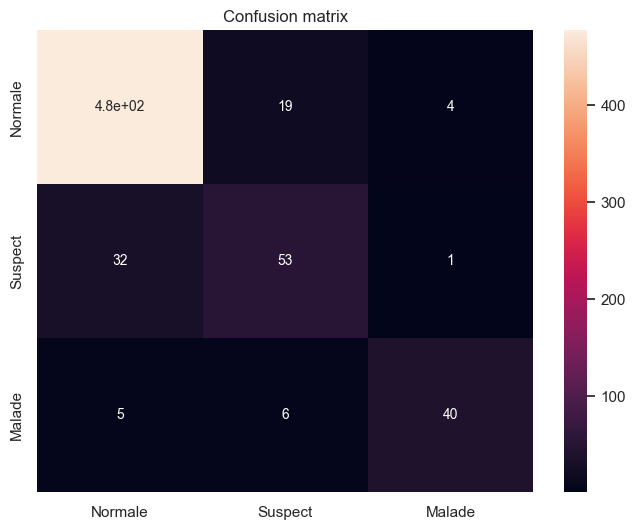

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

With normalized features:

In [28]:
parameters = {'n_neighbors':np.arange(1,20,2), 'p' : np.arange(1,3,1)}
knn_scaled =KNeighborsClassifier()
clf = GridSearchCV(knn_scaled,parameters)
clf.fit(fv_train_scaled,etiq_train)
knn_scaled=KNeighborsClassifier(**clf.best_params_)
knn_scaled.fit(fv_train_scaled,etiq_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [29]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004516,0.004058,0.026987,0.001458,1,1,"{'n_neighbors': 1, 'p': 1}",0.922819,0.926174,0.912752,0.905724,0.902357,0.913965,0.009291,1
2,0.003605,0.001353,0.024165,0.002584,3,1,"{'n_neighbors': 3, 'p': 1}",0.919463,0.919463,0.912752,0.892256,0.902357,0.909258,0.010556,2
1,0.003600,0.001364,0.020926,0.002441,1,2,"{'n_neighbors': 1, 'p': 2}",0.922819,0.926174,0.892617,0.898990,0.898990,0.907918,0.013776,3
4,0.002197,0.000750,0.019112,0.002007,5,1,"{'n_neighbors': 5, 'p': 1}",0.906040,0.922819,0.926174,0.882155,0.885522,0.904542,0.018260,4
3,0.002796,0.000743,0.019106,0.003637,3,2,"{'n_neighbors': 3, 'p': 2}",0.916107,0.916107,0.909396,0.895623,0.875421,0.902531,0.015482,5


In [30]:
yknn_scaled = knn_scaled.predict(fv_test_scaled)
print("accuracy:",metrics.accuracy_score(etiq_test,yknn_scaled))
print("f1 score :",metrics.f1_score(etiq_test,yknn_scaled,average='macro'))

accuracy: 0.9137931034482759
f1 score : 0.8359641771435626


we see that with normalise variables we have a better accuracy and f1 score

Text(0.5, 1.0, 'Confusion matrix')

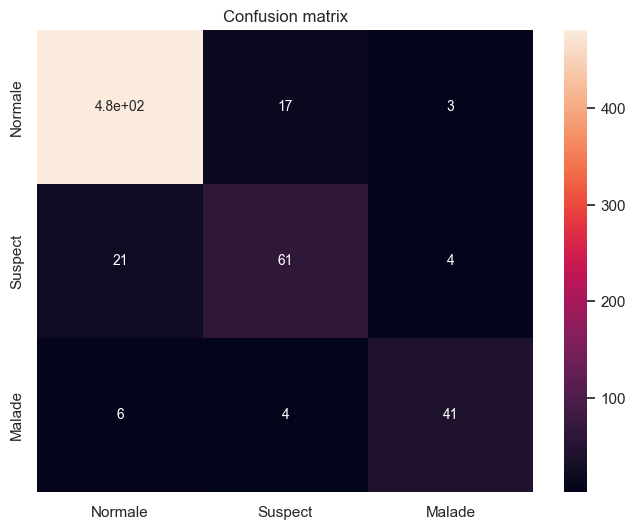

In [31]:

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_scaled), annot=True, annot_kws={"size": 10}, yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

## Random forest :

In [32]:
forrest =RandomForestClassifier(n_estimators=300,max_features='sqrt',criterion='entropy').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average = "macro"))

Accuracy :  0.9420062695924765
F1-score :  0.8806890305109237


In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Instantiate RandomForestClassifier
forrest = RandomForestClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=forrest, param_grid=param_grid, cv=5 )

# Fit GridSearchCV to training data
grid_search.fit(fv_train, etiq_train)

# Get the best model
best_forrest = grid_search.best_estimator_

# Predictions
yforrest = best_forrest.predict(fv_test)

# Print accuracy and F1-score
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(etiq_test, yforrest))
print("F1-score:", metrics.f1_score(etiq_test, yforrest, average="macro"))

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 200}
Accuracy: 0.9341692789968652
F1-score: 0.8652969445975717


with random forest we get a better results

Text(0.5, 1.0, 'Confusion matrix')

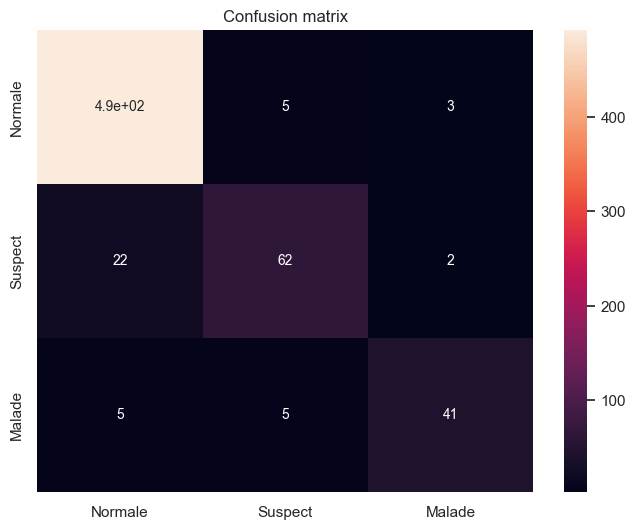

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10}, yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

With normalized features:

In [35]:
forrest =RandomForestClassifier(n_estimators=300,max_features='log2',criterion='entropy',class_weight='balanced').fit(fv_train_scaled,etiq_train)
yforrest_scaled = forrest.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest_scaled, average = "macro"))

Accuracy :  0.9388714733542319
F1-score :  0.8783462279775819


Text(0.5, 1.0, 'Confusion matrix')

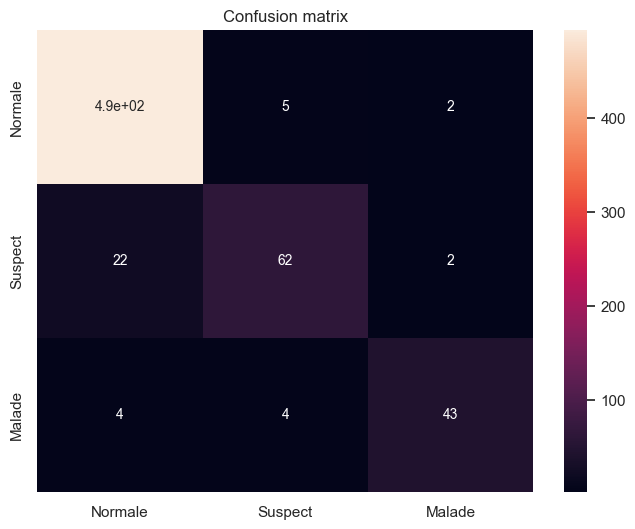

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest_scaled), annot=True, annot_kws={"size": 10}, yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

comparison :

Text(0.5, 1.0, 'With normalization')

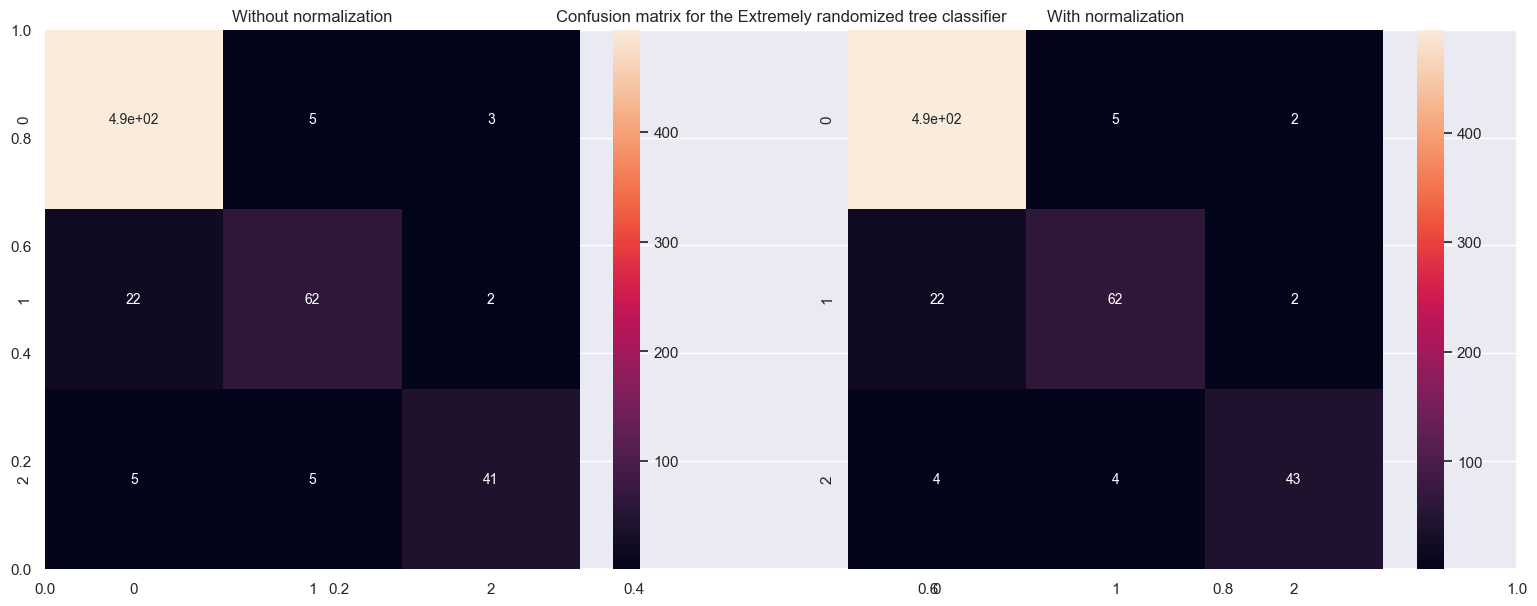

In [37]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(19,7))
plt.title("Confusion matrix for the Extremely randomized tree classifier")
plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10})
plt.title("Without normalization")
plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest_scaled), annot=True, annot_kws={"size": 10})
plt.title("With normalization")

normalisation doesnt have a big impact in the performence of our model 

##  Extremely randomized tree:

In [38]:
extra = ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=0, class_weight='balanced').fit(fv_train,etiq_train)
yextra = extra.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra))
print("F1-score : ",metrics.f1_score(etiq_test, yextra, average = "macro"))

Accuracy :  0.9200626959247649
F1-score :  0.8386098229494436


In [39]:
extra_scaled = ExtraTreesClassifier(n_estimators=1000, criterion='entropy', random_state=0, class_weight='balanced').fit(fv_train_scaled,etiq_train)
yextra_scaled = extra_scaled.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yextra_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, yextra_scaled, average = "macro"))

Accuracy :  0.9200626959247649
F1-score :  0.8386098229494436


## SVM :

In [40]:
svm =SVC(gamma='scale',class_weight='balanced')
svm.fit(fv_train,etiq_train)
ysvm =svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))

Accuracy :  0.8338557993730408
F1-score :  0.7234813490117903


In [41]:
parameters = {'degree':np.arange(1,20,1)}
svm=SVC(gamma='scale', class_weight='balanced')
clf = GridSearchCV(svm, parameters)
clf.fit(fv_train,etiq_train)
svm=SVC(**clf.best_params_)
svm.fit(fv_train,etiq_train)
ysvm=svm.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm, average='macro'))

Accuracy :  0.8557993730407524
F1-score :  0.679357431972312


In [42]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141476,0.015245,0.072379,0.005372,1,{'degree': 1},0.818792,0.855705,0.832215,0.781145,0.804714,0.818514,0.025131,1
16,0.131205,0.007498,0.068427,0.007718,17,{'degree': 17},0.818792,0.855705,0.832215,0.781145,0.804714,0.818514,0.025131,1
15,0.126840,0.002826,0.065990,0.002484,16,{'degree': 16},0.818792,0.855705,0.832215,0.781145,0.804714,0.818514,0.025131,1
14,0.128909,0.003009,0.069044,0.001666,15,{'degree': 15},0.818792,0.855705,0.832215,0.781145,0.804714,0.818514,0.025131,1
13,0.124708,0.005435,0.064865,0.003939,14,{'degree': 14},0.818792,0.855705,0.832215,0.781145,0.804714,0.818514,0.025131,1


Text(0.5, 1.0, 'Confusion matrix')

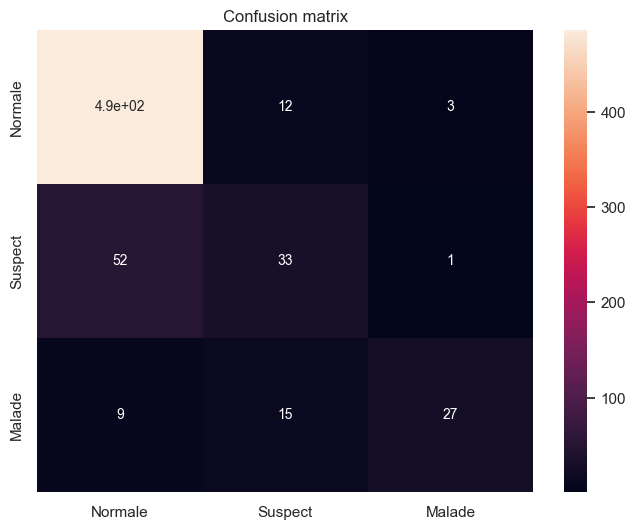

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm), annot=True, annot_kws={"size": 10},yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

With normalized features:

In [44]:
svm =SVC(gamma='scale',class_weight='balanced')
svm.fit(fv_train_scaled,etiq_train)
ysvm_scaled =svm.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ysvm_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, ysvm_scaled, average='macro'))

Accuracy :  0.890282131661442
F1-score :  0.8192258888224897


the normalisation have an impact here

Text(0.5, 1.0, 'Confusion matrix')

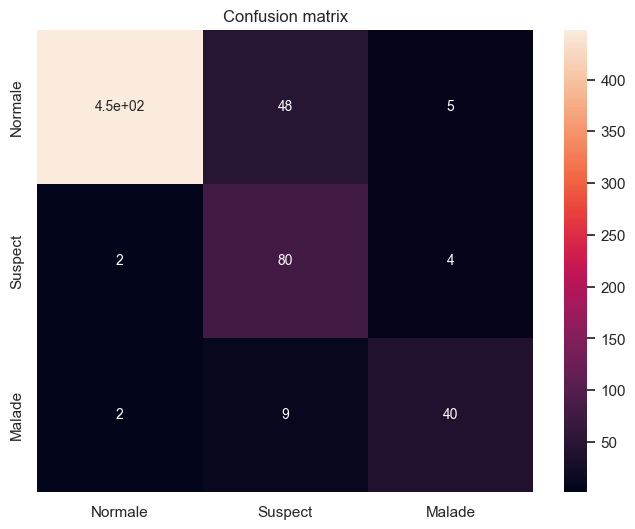

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ysvm_scaled), annot=True, annot_kws={"size": 10},yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

## gradient bossting classifiers :

In [46]:
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=1.0,max_depth=1)
gbc.fit(fv_train,etiq_train)
ygcb = gbc.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygcb))
print("F1-score : ",metrics.f1_score(etiq_test, ygcb, average='macro'))

Accuracy :  0.9231974921630094
F1-score :  0.8639366591037746


Text(0.5, 1.0, 'Confusion matrix')

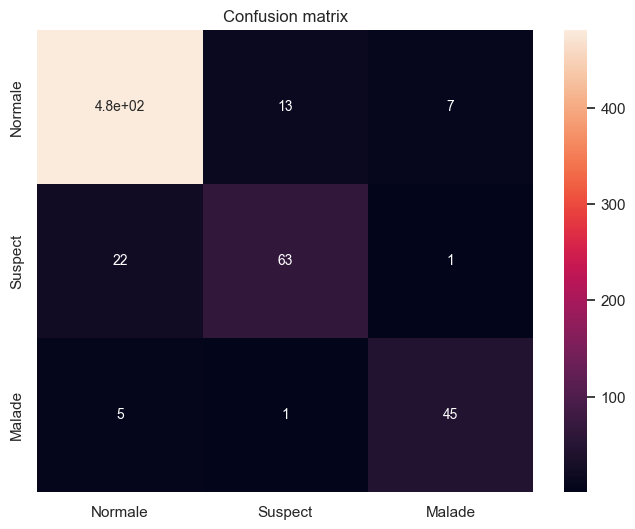

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygcb), annot=True, annot_kws={"size": 10},yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

With normalized features:

In [48]:
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=1.0,max_depth=1)
gbc.fit(fv_train_scaled,etiq_train)
ygcb_scaled = gbc.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, ygcb_scaled))
print("F1-score : ",metrics.f1_score(etiq_test, ygcb_scaled, average='macro'))

Accuracy :  0.9231974921630094
F1-score :  0.8639366591037746


same case without normalisation

Text(0.5, 1.0, 'Confusion matrix')

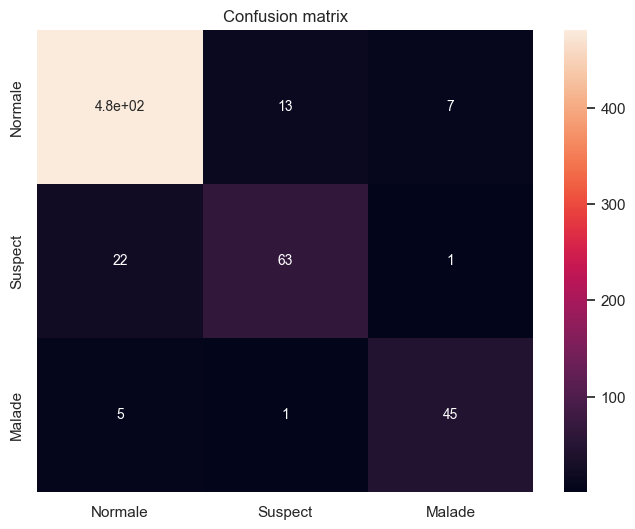

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, ygcb_scaled), annot=True, annot_kws={"size": 10},yticklabels=["Normale", "Suspect", "Malade"], xticklabels=["Normale", "Suspect", "Malade"])
plt.title('Confusion matrix')

## PCA

In [50]:
from sklearn.decomposition import PCA

no histogramms features

In [56]:
X = fetal_health[['baseline value', 
          'accelerations', 
          'fetal_movement',
          'uterine_contractions', 
          'light_decelerations', 
          'severe_decelerations',
          'prolongued_decelerations', 
          'abnormal_short_term_variability',
          'mean_value_of_short_term_variability',
          'mean_value_of_long_term_variability',
          'percentage_of_time_with_abnormal_long_term_variability']]
y = fetal_health[['fetal_health']]

scale data with standard scalar :

In [57]:
sc = StandardScaler().set_output(transform='pandas')
scaled = sc.fit(X).transform(X)

In [61]:
pca = PCA()
pca.fit(scaled)
d = {'Feature':scaled.columns.values, 'PCA Variance Ratio':pca.explained_variance_ratio_}
pca_info = pd.DataFrame(data=d)
l=[]
for j in range(1, len(pca_info['PCA Variance Ratio']) + 1):
  l.append(sum(pca_info['PCA Variance Ratio'].iloc[:j]))

pca_info['Sum PCA Variance'] = l
display(pca_info)

,Feature,PCA Variance Ratio,Sum PCA Variance
0,baseline value,0.250640,0.250640
1,accelerations,0.148219,0.398859
2,fetal_movement,0.107775,0.506633
3,uterine_contractions,0.102701,0.609334
4,light_decelerations,0.089323,0.698657
5,severe_decelerations,0.076052,0.774709
6,prolongued_decelerations,0.066112,0.840821
7,abnormal_short_term_variability,0.059541,0.900362
8,mean_value_of_short_term_variability,0.043945,0.944307
9,mean_value_of_long_term_variability,0.036622,0.980929
